# Gradient Descent

Gradient Descent is an algorithm that finds the local extrema of a function. This is applicable to machine learning, because we want to find the optimal parameters that minimize our loss function. In machine learning, loss functions quantify the amount of error between the predicted values from a machine learning model and the actual expected values. In this notebook, we will perform linear regression by using gradient descent to find the optimal slope and y-intercept.

## Training Dataset

Importing the libraries

In [1]:
import numpy as np

import matplotlib.pyplot as plt
!pip install scienceplots
import scienceplots
from IPython.display import display, Latex, Image

!pip install celluloid
from celluloid import Camera

np.random.seed(0)
plt.style.use(["science", "no-latex"])

Let's look at the training dataset. We will use columns 2 and 4 of the txt file. The linear regression model will find the optimal slope and y-intercept to fit the data.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


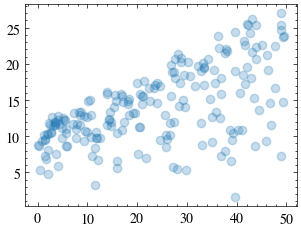

In [2]:
from google.colab import drive
drive.mount('/content/drive')



fname = "/content/drive/MyDrive/colab-data-teaching/REGRESSION-gradientDescent-data.txt"
x, y = np.loadtxt(fname, delimiter=",", unpack=True, skiprows=1, usecols=(2, 4))

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x, y, color="#1f77b4", marker="o", alpha=0.25)

## Loss Function: Mean Squared Error

For the linear regression model, the predicted value $\hat{y}$ is the dot product of the weight and x input vectors plus a bias term

$\hat{y} = w x + b$

We will use the mean squared error function as our loss function.

$
\begin{align*}
MSE &= \frac{1}{n} \sum_{i=1}^{n}(y_{i}-\hat{y})^2 \\
&= \frac{1}{n} \sum_{i=1}^{n}(y_{i}-(w x_{i} + b))^2
\end{align*}
$

## Loss Function Gradient

In [3]:
def mse_loss(x, y, w, b):
    return np.mean(np.square(y - (w * x + b)))

In each epoch of gradient descent, a parameter is updated by subtracting the product of the gradient of the function and the learning rate ($lr$). The learning rate controls how much the parameters should change. Small learning rates are precise, but are slow. Large learning rates are fast, but may prevent the model from finding the local extrema.

$
\begin{align*}
X_{n+1} = X_n - \gamma * \nabla f(X_n)
\end{align*}
$

Since we are finding the optimal slope ($w$) and y-intercept ($b$) for our linear regression model, we must find the partial derivatives of the loss function with respect to $w$ and $b$.

## Loss Function in Terms of W

[link text](https://)Loss function with respect to $w$:

$
\begin{align*}
\frac{\partial }{\partial w} \left( MSE \right) &= \frac{\partial }{\partial w}[\frac{1}{n} \sum_{i=1}^{n}(y_{i}-(w x_{i} + b))^2] \\
&= \frac{1}{n} \sum_{i=1}^{n} \frac{\partial }{\partial w}[(y_{i}-(w x_{i} + b))^2] \\
&= \frac{2}{n} \sum_{i=1}^{n} (y_{i}-(w x_{i} + b))\frac{\partial }{\partial w}[y_{i}-(w x_{i} + b)] \\
&= \frac{2}{n} \sum_{i=1}^{n} (y_{i}-(w x_{i} + b))(-x_{i}) \\
&= -\frac{2}{n} \sum_{i=1}^{n}x_{i}(y_{i}-(w x_{i} + b))
\end{align*}
$

In [4]:
def mse_loss_dw(x, y, w, b):
    return -2 * np.mean(x * (y - (w * x + b)))

## Loss Function in Terms of b

Loss function with respect to $b$:

$
\begin{align*}
\frac{\partial}{\partial b} \left( MSE \right) &=  \frac{\partial }{\partial b}[\frac{1}{n} \sum_{i=1}^{n}(y_{i}-(w x_{i} + b))^2] \\
&= \frac{1}{n} \sum_{i=1}^{n} \frac{\partial }{\partial b}[(y_{i}-(w x_{i} + b))^2] \\
&= \frac{2}{n} \sum_{i=1}^{n} (y_{i}-(w x_{i} + b))\frac{\partial }{\partial b}[y_{i}-(w x_{i} + b)] \\
&= \frac{2}{n} \sum_{i=1}^{n} (y_{i}-(w x_{i} + b))(-1) \\
&= -\frac{2}{n} \sum_{i=1}^{n} (y_{i}-(w x_{i} + b))
\end{align*}
$

In [5]:
def mse_loss_db(x, y, w, b):
    return -2 * np.mean(y - (w * x + b))

## Training the Linear Regression Model

Let's define a function that uses the gradient algorithm to update the parameters of the loss function. The function uses the gradient functions we derived earlier.

General Gradient Descent Equation:

$ X_{n+1} = X_n - lr * \frac{\partial}{\partial X} f(X_n)$.

Bias Gradient Descent:

$
\begin{align*}
b &= b - \eta \frac{\partial}{\partial b} [L(\vec{w}, b)] \\
&= b - \eta [-\frac{2}{n} \sum_{i=1}^{n} (y_{i}-(w x_{i} + b))]
\end{align*}
$

Weights Gradient Descent:

$
\begin{align*}
b &= b - \eta \frac{\partial}{\partial b} [L(\vec{w}, b)] \\
&= b - \eta [-\frac{2}{n} \sum_{i=1}^{n}x_{i}(y_{i}-(w x_{i} + b))]
\end{align*}
$

In [6]:
def update_w_and_b(x, y, w, b, learning_rate):
    # update w and b
    w = w - mse_loss_dw(x, y, w, b) * learning_rate
    b = b - mse_loss_db(x, y, w, b) * learning_rate

    return w, b

## Graphing functions

Let's define helper functions to plot the graphs.

In [7]:
def create_plots():
    plt.ioff()
    fig = plt.figure(figsize=(16 / 9.0 * 4, 4 * 1), layout="constrained")
    fig.suptitle("Gradient Descent")
    ax0 = fig.add_subplot(1, 2, 1)
    ax0.set_xlabel("Spending", fontweight="normal")
    ax0.set_ylabel("Sales", fontweight="normal")
    ax0.set_title("Linear Regression")

    ax1 = fig.add_subplot(1, 2, 2, projection="3d")
    ax1.set_xlabel("Slope, w")
    ax1.set_ylabel("Intercept, b")
    ax1.set_zlabel("Error")
    ax1.set_title("Error")
    ax1.view_init(15, -35)

    camera = Camera(fig)
    return ax0, ax1, camera


def generate_error_range(x, y, N, w_max, b_max):
    w_range = np.arange(0, w_max, w_max / N)
    b_range = np.arange(0, b_max, b_max / N)
    w_range, b_range = np.meshgrid(w_range, b_range)
    w_range = w_range.flatten()
    b_range = b_range.flatten()

    error_range = np.array([])
    for i in range(min(w_range.shape[0], b_range.shape[0])):
        error_range = np.append(error_range, mse_loss(x, y, w_range[i], b_range[i]))

    return w_range, b_range, error_range

## Training the model

The train function will update the parameters in each epoch and update the visualization.

In [8]:
def train(x, y, w0, b0, learning_rate, epochs, output_filename):
    w = w0
    b = b0

    ax0, ax1, camera = create_plots()
    loss_dims = 20
    w_max = 0.5
    b_max = 15
    w_range, b_range, error_range = generate_error_range(x, y, loss_dims, w_max, b_max)

    for e in range(epochs):
        w, b = update_w_and_b(x, y, w, b, learning_rate)
        if (
            (e == 0)
            or (e < 60 and e % 5 == 0)
            or (e < 3000 and e % 1000 == 0)
            or (e % 3000 == 0)
        ):
            # Plot the error given the current slope and y-intercept
            ax1.scatter(w_range, b_range, error_range, color="blue", alpha=0.05)
            ax1.scatter([w], [b], [mse_loss(x, y, w, b)], color="red", s=100)

            # Plot the linear regression lines
            ax0.scatter(x, y, color="#1f77b4", marker="o", alpha=0.25)
            X_plot = np.linspace(0, 50, 50)
            ax0.plot(X_plot, X_plot * w + b, color="black")

            # print the loss
            print("epoch: ", str(e), "loss: " + str(mse_loss(x, y, w, b)))
            camera.snap()

    animation = camera.animate()
    animation.save(output_filename, writer="pillow")
    plt.show()

    return w, b

Let's train the linear regression model on a sample dataset.

epoch:  0 loss: 197.25274270926414
epoch:  5 loss: 112.88939636458916
epoch:  10 loss: 74.66409989764938
epoch:  15 loss: 57.34204113744597
epoch:  20 loss: 49.490344392988355
epoch:  25 loss: 45.929244266843334
epoch:  30 loss: 44.31200864892866
epoch:  35 loss: 43.57543700948768
epoch:  40 loss: 43.237843105871576
epoch:  45 loss: 43.08099946508624
epoch:  50 loss: 43.00603965880256
epoch:  55 loss: 42.968173826457125
epoch:  1000 loss: 41.62567353799647
epoch:  2000 loss: 40.307849717949104
epoch:  3000 loss: 39.06382181292731


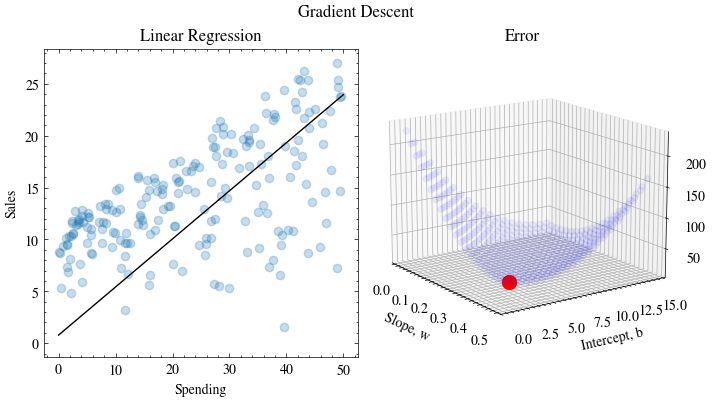

(np.float64(0.4560414772297029), np.float64(1.0259430403235812))

In [9]:
fname = "REGRESSION-gradientDescent-data.txt"
x, y = np.loadtxt(fname, delimiter=",", unpack=True, skiprows=1, usecols=(2, 4))
output_filename = "gradient_descent.gif"
train(x, y, 0.0, 0, 0.00005, 4000, output_filename)

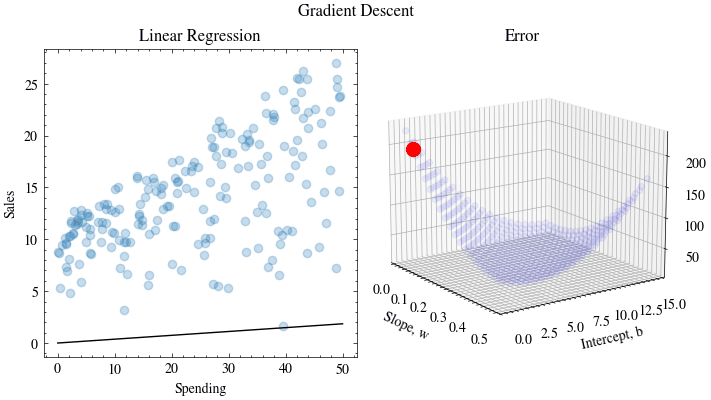

In [10]:
Image(filename=output_filename)